In [56]:
import os, pickle, jax
os.chdir('..' if os.getcwd().endswith("/eugene") else '.')

# run on CPU
# jax.config.update('jax_platform_name', 'cpu')
# os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.environ["JAX_PLATFORM_NAME"] = "cpu"

import pandas as pd
from eugene.vae import VAE
from flax import nnx
import matplotlib.pyplot as plt

In [57]:
model_file = 'eugene/latest.pickle'

In [58]:
with open(model_file, 'rb') as file:
    model_dict = pickle.load(file)

model = VAE(rngs=nnx.Rngs(0))

model.opts = model_dict['opts']
model.stats = model_dict['stats']
nnx.update(model, model_dict['state'])

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

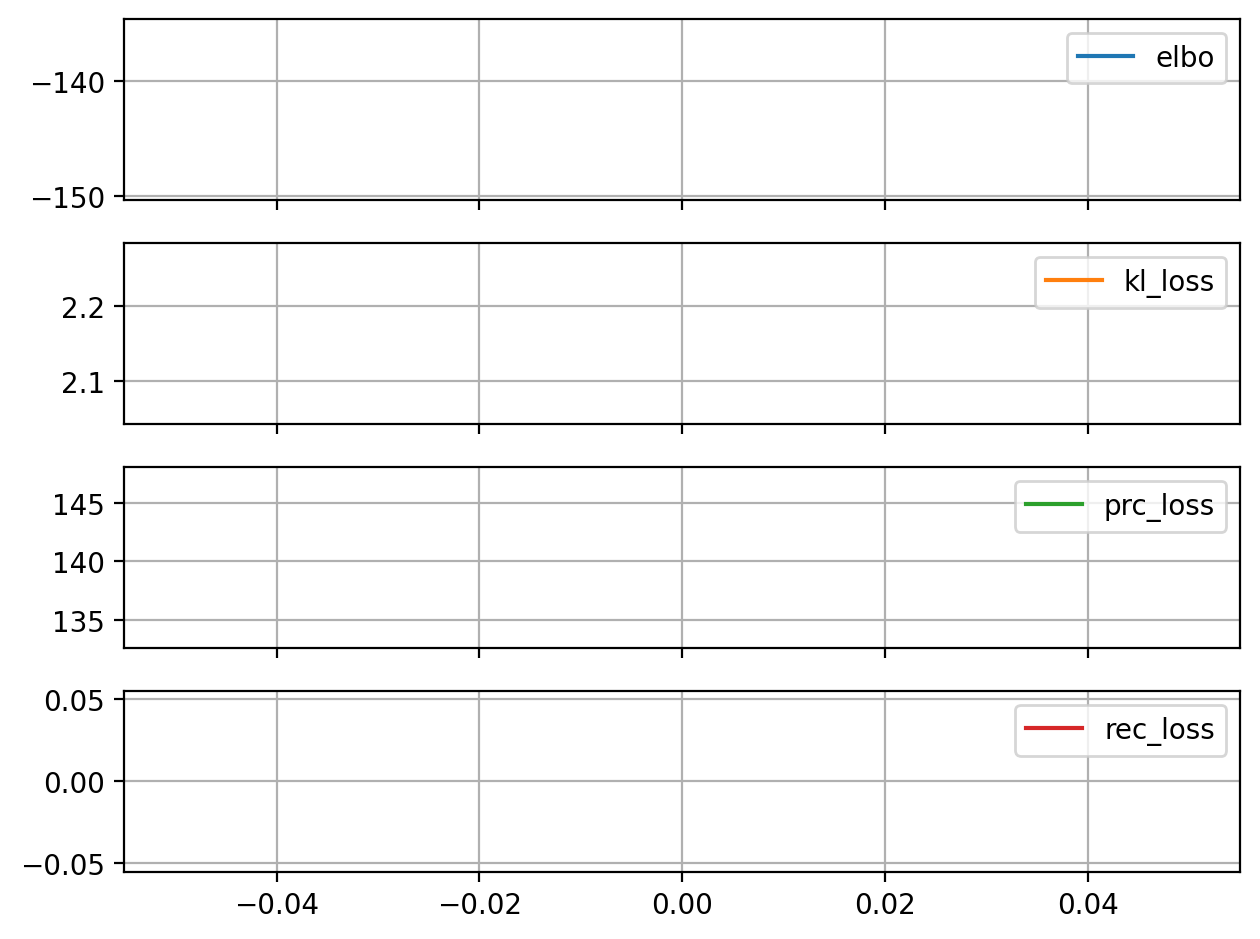

In [59]:
df = pd.DataFrame(model.stats['train'])
df.plot(subplots=True)

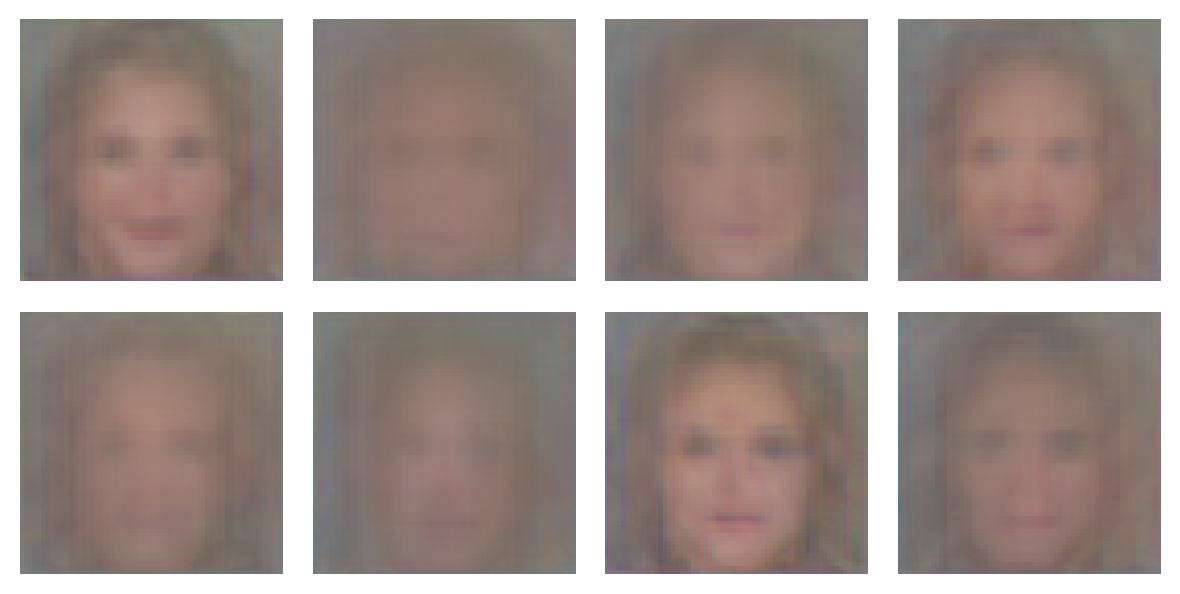

In [62]:
z = jax.random.normal(model.rngs(), (8, model.opts.dz)) * 1.0
x = model.decode(z)#.transpose(0, 2, 1, 3)
# plot x as an image grid
plt.figure(figsize=(6, 6))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')

# plt.imshow(x[0]., cmap='gray')
# plt.grid(False)